Models Comparsion

In [6]:
import pandas as pd
import numpy as np
from cmdstanpy import CmdStanModel
import arviz as az
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
pima = pd.read_csv('Data/diabetes.csv', sep=';')
df = pd.read_csv('Data/diabetes_pt1.csv', sep=';')
df_test = pd.read_csv('Data/diabetes_pt2.csv', sep=';')

In [8]:
feature_columns1 = ['Glucose', 'BMI', 'Age']
feature_columns2 = ['Glucose', 'Age', 'BMI', 'BloodPressure', 'Insulin', 'DiabetesPedigreeFunction']

stan1_data = {
    'N': len(df),
    'X': df[feature_columns1].values,
    'y': df['Outcome'].values
}

stan2_data = {
    'N': len(df),
    'X': df[feature_columns2].values,
    'y': df['Outcome'].values
}

sm1 = CmdStanModel(stan_file='Stan/code_1.stan')
fit1 = sm1.sample(data=stan1_data, iter_sampling=2000, chains=4, iter_warmup=1000)

sm2 = CmdStanModel(stan_file='Stan/code_2.stan')
fit2 = sm2.sample(data=stan2_data, iter_sampling=2000, chains=4, iter_warmup=1000)

idata1 = az.from_cmdstanpy(posterior=fit1, log_likelihood="log_lik")
idata2 = az.from_cmdstanpy(posterior=fit2, log_likelihood="log_lik")

waic1 = az.waic(idata1)
waic2 = az.waic(idata2)
loo1 = az.loo(idata1)
loo2 = az.loo(idata2)

print("Model 1 WAIC:", waic1)
print("Model 2 WAIC:", waic2)
print("Model 1 PSIS-LOO:", loo1)
print("Model 2 PSIS-LOO:", loo2)

comparison = az.compare({'model1': idata1, 'model2': idata2}, ic="waic")
print(comparison)

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

INFO:cmdstanpy:CmdStan done processing.


INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

INFO:cmdstanpy:CmdStan done processing.


/tmp/ipykernel_56131/3058903877.py:25: DeprecationWarning: `product` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `prod` instead.
  waic1 = az.waic(idata1)
/tmp/ipykernel_56131/3058903877.py:26: DeprecationWarning: `product` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `prod` instead.
  waic2 = az.waic(idata2)
/usr/local/lib/python3.12/site-packages/arviz/stats/stats.py:1635: UserWarning: For one or more samples the posterior variance of the log predictive densities exceeds 0.4. This could be indication of WAIC starting to fail. 
See http://arxiv.org/abs/1507.04544 for details
  warnings.warn(
/tmp/ipykernel_56131/3058903877.py:27: DeprecationWarning: `product` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `prod` instead.
  loo1 = az.loo(idata1)
/usr/local/lib/python3.12/site-packages/arviz/stats/stats.py:1048: RuntimeWarning: overflow encountered in exp
  weights = 1 / np.exp(len_scale

Model 1 WAIC: Computed from 8000 by 293 log-likelihood matrix

          Estimate       SE
elpd_waic  -147.82     6.83
p_waic        4.80        -
Model 2 WAIC: Computed from 8000 by 293 log-likelihood matrix

          Estimate       SE
elpd_waic  -146.50     7.71
p_waic        6.09        -

There has been a warning during the calculation. Please check the results.
Model 1 PSIS-LOO: Computed from 8000 by 293 log-likelihood matrix

         Estimate       SE
elpd_loo  -147.92     6.83
p_loo        4.90        -

There has been a warning during the calculation. Please check the results.
------

Pareto k diagnostic values:
                         Count   Pct.
(-Inf, 0.5]   (good)      209   71.3%
 (0.5, 0.7]   (ok)         24    8.2%
   (0.7, 1]   (bad)        49   16.7%
   (1, Inf)   (very bad)   11    3.8%

Model 2 PSIS-LOO: Computed from 8000 by 293 log-likelihood matrix

         Estimate       SE
elpd_loo  -146.51     7.71
p_loo        6.10        -
------

Pareto k diagnostic val

/usr/local/lib/python3.12/site-packages/arviz/stats/stats.py:1635: UserWarning: For one or more samples the posterior variance of the log predictive densities exceeds 0.4. This could be indication of WAIC starting to fail. 
See http://arxiv.org/abs/1507.04544 for details
  warnings.warn(


/usr/local/lib/python3.12/site-packages/arviz/stats/stats.py:1635: UserWarning: For one or more samples the posterior variance of the log predictive densities exceeds 0.4. This could be indication of WAIC starting to fail. 
See http://arxiv.org/abs/1507.04544 for details
  warnings.warn(


         rank        waic    p_waic    d_waic    weight        se       dse  \
Model 2     0 -146.499481  6.090331  0.000000  0.731544  7.712629  0.000000   
Model 1     1 -147.821528  4.796569  1.322046  0.268456  6.826938  2.502764   

         warning waic_scale  
Model 2     True        log  
Model 1    False        log  


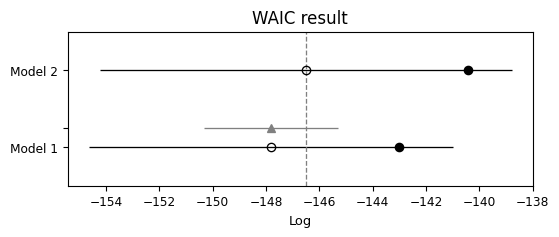

In [9]:
compare_dict = {'Model 1': fit1, 'Model 2': fit2}

waic_compare = az.compare(compare_dict, ic='waic')
print(waic_compare)
az.plot_compare(waic_compare)
plt.title('WAIC result')
plt.show()

/usr/local/lib/python3.12/site-packages/arviz/stats/stats.py:1048: RuntimeWarning: overflow encountered in exp
  weights = 1 / np.exp(len_scale - len_scale[:, None]).sum(axis=1)
/usr/local/lib/python3.12/site-packages/arviz/stats/stats.py:811: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.7 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  warnings.warn(


         rank         loo     p_loo     d_loo    weight        se       dse  \
Model 2     0 -146.511690  6.102540  0.000000  0.744779  7.713084  0.000000   
Model 1     1 -147.924606  4.899647  1.412916  0.255221  6.834924  2.500037   

         warning loo_scale  
Model 2    False       log  
Model 1     True       log  


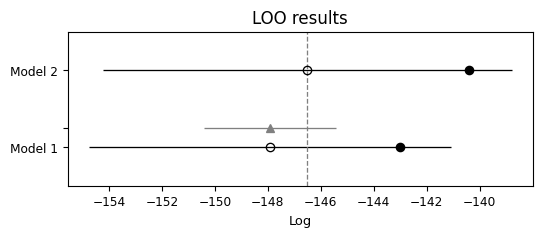

In [10]:
loo_compare = az.compare(compare_dict, ic='loo')
print(loo_compare)
az.plot_compare(loo_compare)
plt.title('LOO results')
plt.show()